## Purpose
Today we're reviewing K-Means clustering and the many variants. Clustering is a form of 
unsupervised learning, that is quite intuitive and useful (in certain circumstances). 


## What is Cluster Analysis
First, cluster analysis is a set of methodologies that are utilized to group data by *similarity*.
This can be utilized as a standalone unsupervised model, as an analytical tool, or as form of
feature reduction. 

An example to build intuition is as follows. Say we have a dataset containing 1,000 companies and
associated attributes for those companies, such as employee count, annual expenses, annual 
revenue. With those 2 attributes, visualize a 2D scatter plot. 

You may see some companies, in the lower left hand corner, 
with low revenue and low expenses. Or another group
of companies in another corner with low expenses and high revenue. The more you
look, the more natural groupings you'll be able to visually identify. You may be able to even 
manually group the companies based on those three features, which is awesome, and the goal of 
clustering!

But what happens if we have more attributes? Like employee count, average customer rating, product
count, sales volume, etc... It now gets much harder to visualize, and much harder to logically
group companies, taking into account a multitude of attributes. This is an area where clustering
algorithms come in handy.

## What is K-Means
So what is K-Means cluster analysis? It's a pretty simple algorithm that works as follows:
1. The user selects the hyper-parameter value for *k*. and the number of iterations n.
2. For each iteration n:
    1. For each observation obs:
       1. Find distance obs is from each centroid.
       2. Assign obs to nearest centroid.
   2. Move each centroid k to the mean of the observations assigned to it's  respective cluster.

## Variations and Hyper-Parameters
There are really 3 things you can change in the K-Means algorithm. 
1. The value of k, which allows you to dictate the number of clusters to be formed.
2. The calculation used for measuring distance. Standard wood be Euclidean distance, but Manhattan
distance among others could also be used.
3. The statistic used for moving the centroid can also be changed. Rather than K-Means, we could
calculate K-Median, for instance. 


## Limitations

From my perspective, there are several major limitations to using K-Means clustering. The 
required data assumptions, how new data is handled, and the selection of k. 

First, when utilizing K-Means, you have to assume the data is distributed in a spherical manner. 
Otherwise, the clusters will likely not be very logical when analyzed. A straightforward illustration
of this, is showing results of K-Means on 2D, non spherical data. You can visually see that the 
resulting clusters do not make sense.

Another limitation, is how it handles new data. The number of clusters, k, is set. So, if a month
after a deployment, a seemingly new cluster forms some where in the data space, that in the case of
2d data, could easily be visually identified. It doesn't matter, it will still be assigned to 
one of the original k-clusters. Other clustering algorithms hae *noise* components that can better
adapt and handle unseen data distributions in my opinion.

Finally, I find the the selection of *k* to be boarding more art than science. We have the *elbow
test* and other similar metrics to guide us in our selection, but at the end of the day the selection
of k is at the discretion of the data scientist. Which is unsettling to me.

## Example
For the example, we're going to read in a table wtih
three columns: gender, height, and weight. For now, we're
going to ignore gender, and just look at height and weight.

The first step, as always, is to import relevant libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we read in our data into a Pandas dataframe.

In [8]:
url = "https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv"
data = pd.read_csv(url)
data["Gender"] = [1 if g == "Male" else 0 for g in data["Gender"]]
X = data[["Height", "Weight"]].values
y = data["Gender"].values
data.sample(5)

,Gender,Height,Weight
9095,0,66.249361,140.799489
4699,1,69.064131,176.355211
8242,0,60.859309,101.173339
2630,1,68.224860,186.197250
9679,0,61.593362,109.450018


Here we're defining our distant measure. We're going to use the standard Euclidean distance
(L2-Norm).

$$ L2-Norm = \sqrt{\sum{||\vec{a}-\vec{b}||}} $$

In [39]:
def euclidean_norm(a, b,centers=False):
    a = np.array(a)
    b = np.array(b)
    axis = 1
    if centers = True:
        axis=0
    return np.sqrt(np.sum((a - b)**2, axis=axis))

Now we build our k_means model object.  It has two parameters we haven't discussed yet; tol
and seed. tol is a threshold for how much the centroids are moving from iteration to iteration.
If a the centroids are stable no longer moving, than we can stop early. 

seed is a common parameter name for random generators. If you set the seed, then you can re-produce
results, even when stochastic processes are involved. In this case, the stochastic process is
the initialization of the centroids.

In [100]:
class k_means:
    def __init__(self, k=3, tol=10e-4, iters=10, seed=None):
        self.k = k
        self.centroids = []
        self.k = k
        self.tol = tol
        self.iters = iters
        self.seed = seed
        
    def fit(self, X):
        # initialize clusters
        if self.seed != None:
            np.random.seed(self.seed)

        for i in range(0,self.k):
            self.centroids.append(np.random.uniform(X.min(),X.max(), X.ndim))
        for j in range(0,self.iters):
            # Calculate distances
            dists = []
            for i in range(0, self.k):    
                dists.append(euclidean_norm(self.centroids[i],X))
            dists = np.array(dists).T

            
            # Assign Clusters
            cluster = []
            for i in range(0,self.k):
                cluster.append([])
            
            for i in range(0,len(dists)):
                mini = dists[i].min()
                
                for m in range(0,len(dists[i])):
                     if dists[i][m] == mini:
                            cluster[m].append(X[i])
                            break

            # Find new centroids/Check tolerance
            tol_met = 0
            for i in range(0, self.k):
                new_center = np.array(cluster[i]).mean(axis=0)
                if euclidean_norm(self.centroids[i], new_center,centers=True) < self.tol: 
                    tol_met = tol_met + 1
                
                self.centroids[i] = new_center

            # Check tolerance
            if tol_met == X.ndim:
                self.centroids = np.array(self.centroids)
                break
                
        self.centroids = np.array(self.centroids)

    def predict(self,X):
        # Calculate distances
        dists = []
        for centroid in self.centroids:    
            dists.append(euclidean_norm(centroid,X))
        dists = np.array(dists).T
        print(dists)
        # Assign Clusters
        cluster = []
        
        for i in range(0,len(dists)):
            cluster.append(dists[i].argmin())

        return cluster

Now that we have the k_means object, we instantiate it, and fit it to our data.

In [101]:
algo = k_means(2,iters=100,seed=5)
algo.fit(X)

Once our model is trained, let's check where the centroids are.

In [102]:
algo.centroids

array([[ 63.41701515, 134.36937255],
       [ 69.35970318, 188.89300655]])

Finally, let's visualize the data. Here, we'll color code the observations with there gender.
You'll see the two centroids find the centers of the two sub-populations, male and female.

In [103]:
me = [[71,185],[63,110]]
algo.predict(me)

[[51.19533275  4.22446135]
 [24.37294033 79.14892486]]


[1, 0]

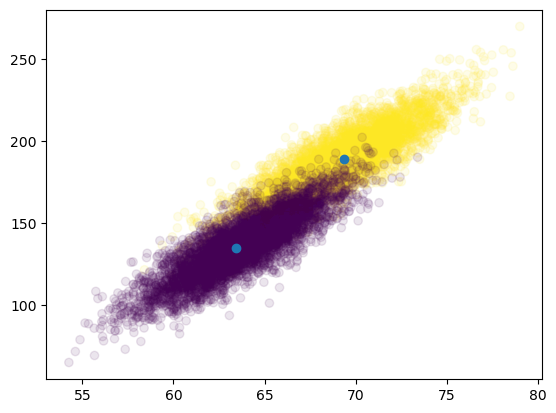

In [34]:
plt.scatter(X[:,0],X[:,1],c=y, alpha=0.1)
plt.scatter(algo.centroids[:,0], algo.centroids[:,1])

## Metrics
First, let's talk about the **Silhouette Coefficient (SC)**. The takes into
account both cohesion and separation. Cohesion is a measure of how similar
 the observations within a cluster are too each other. Separation is looking
at how similar the observations of a cluster are with other clusters.
Inertia
Distance & Similarity

In [105]:
def silhouette_coefficient(data,model):
    # Assign data to cluster
    X = data.copy()
    y = model.predict(X)
    # calculate silhouette_coefficient for each cluster
    for k in model.centroids:
        #do something
    
    return

In [107]:
def inertia(data,centroids):
    # Do Something
    return

## conclusion
